<div style="border:solid green 2px; padding: 20px">

<b>Привет, Дима! Поздравляю с выполнением очередного проекта!!</b>

Меня зовут Петр Раздобреев и я буду проверять твою работу. Попробую помочь сделать тебе её еще лучше! В Практикуме принято общени на ты, но если это дискомфортно, то сообщи об этом)

Ниже ты найдешь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>☁️Так выделены самые важные замечания. Без их отработки проект не будет принят. </div>

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>⛅️ Так выделены небольшие замечания.Такие замечания в проекте допустимы, это пространство для улучшений в будущем.
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️Так я выделяю успешные идеи.</div>

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комменатри — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента:</b> Например, вот так.</div>

Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 
    

**Постановка задачи**

Ваша задача — провести оценку результатов A/B-теста. В вашем распоряжении
есть датасет с действиями пользователей, техническое задание и несколько
вспомогательных датасетов.
Оцените корректность проведения теста и проанализируйте его результаты.
Чтобы оценить корректность проведения теста:
удостоверьтесь, что нет пересечений с конкурирующим тестом и нет
пользователей, участвующих в двух группах теста одновременно;
проверьте равномерность распределения пользователей по тестовым группам
и правильность их формирования

цель исследования

основной целью является проверка изменений, связанных с внедрением улучшенной рекомендательной системы. Ожидаемый эффект - улучшение каждого показателя не менее чем на 5 процентных пунктов.

In [1]:
!pip install statsmodels

In [2]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')
#from plotly.subplots import
from statsmodels.stats.proportion import proportions_ztest

import math as mth


In [3]:
marketing_events = pd.read_csv('https://code.s3.yandex.net/datasets/ab_project_marketing_events.csv')
new_users = pd.read_csv('https://code.s3.yandex.net/datasets/final_ab_new_users.csv')
final_ab_events = pd.read_csv('https://code.s3.yandex.net/datasets/final_ab_events.csv')
participants = pd.read_csv('https://code.s3.yandex.net/datasets/final_ab_participants.csv')
marketing = pd.read_csv('https://code.s3.yandex.net/datasets/ab_project_marketing_events.csv')

In [4]:
marketing_events.head()


,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11


In [5]:
new_users.head()


,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone


In [6]:
final_ab_events.head()


,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99


In [7]:
participants.head()

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,482F14783456D21B,B,recommender_system_test


In [8]:
marketing.head()

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11


In [9]:
#типы данных для таблицы marketing_events
print("Типы данных для таблицы marketing_events:")
print(marketing_events.info())

#типы данных для таблицы new_users
print("\nТипы данных для таблицы new_users:")
print(new_users.info())

#типы данных для таблицы final_ab_events
print("\nТипы данных для таблицы final_ab_events:")
print(final_ab_events.info())

#типы данных для таблицы participants
print("\nТипы данных для таблицы participants:")
print(participants.info())

#типы данных для таблицы marketing
print("\nТипы данных для таблицы marketing:")
print(marketing.info())


Типы данных для таблицы marketing_events:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 576.0+ bytes
None

Типы данных для таблицы new_users:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61733 entries, 0 to 61732
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     61733 non-null  object
 1   first_date  61733 non-null  object
 2   region      61733 non-null  object
 3   device      61733 non-null  object
dtypes: object(4)
memory usage: 1.9+ MB
None

Типы данных для таблицы final_ab_events:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440317 entries, 0 to 440316
Data columns (total 4 c

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
для вывода `info` дополнительно необязательно писать `print`


<div class="alert alert-info"> <b></b> хорошо</div>


In [10]:
new_users['first_date'] = pd.to_datetime(new_users['first_date'], format='%Y-%m-%d')
final_ab_events['event_dt'] = pd.to_datetime(final_ab_events['event_dt'], format='%Y-%m-%d %H:%M:%S')
final_ab_events['date'] = final_ab_events['event_dt'].dt.date



<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Рекламирую параметр `parse_dates`, очень полезно для изменения типа данных при считывании датафреймов

<div class="alert alert-info"> <b></b> изучу</div>


In [11]:
len(new_users[(new_users['first_date'] == '2020-12-22') | (new_users['first_date'] == '2020-12-23')])
print('Общее количество новых пользователей:', len(new_users['user_id']))


Общее количество новых пользователей: 61733


In [12]:
# наличие пропущенных значений и дубликатов
print(marketing_events.isnull().sum())
print(new_users.isnull().sum())
print(final_ab_events.isnull().sum())
print(participants.isnull().sum())


name         0
regions      0
start_dt     0
finish_dt    0
dtype: int64
user_id       0
first_date    0
region        0
device        0
dtype: int64
user_id            0
event_dt           0
event_name         0
details       377577
date               0
dtype: int64
user_id    0
group      0
ab_test    0
dtype: int64


In [13]:
print(marketing_events.duplicated().sum())
print(new_users.duplicated().sum())
print(final_ab_events.duplicated().sum())
print(participants.duplicated().sum())

0
0
0
0


<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>⛅️ 

Первичный анализ по датафреймам похож и рекомендовал бы схожие действия обернуть в фнукцию для первичного анализа 
</div>

In [14]:
#пользователеи, участвующие в тесте
test_users = participants[participants['ab_test'] == 'recommender_system_test']
display(test_users.head())

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,482F14783456D21B,B,recommender_system_test


In [15]:
#период набора пользователей в тест
print(new_users['first_date'].min())
print(new_users['first_date'].max())


2020-12-07 00:00:00
2020-12-23 00:00:00


<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>☁️

Всё же в `new_users` имеются и пользователи параллельного теста, поэтому прошу удалить сначала таких пользователей и проверить даты набора пользователей повторно
</div>

<div class="alert alert-info"> <b></b> исправил </div>

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
   

Отлично, теперь видно, что пользователи нашего теста набираются в нужные даты 
</div>

In [16]:
#список пользователей, участвующих в параллельном тесте
parallel_test_users = participants[participants['ab_test'] != 'recommender_system_test']['user_id'].unique()
new_users = new_users[~new_users['user_id'].isin(parallel_test_users)]
new_users = new_users[~new_users['first_date'].isin(['2020-12-22', '2020-12-23'])]


In [17]:
#период набора пользователей в тест
print(new_users['first_date'].min())
print(new_users['first_date'].max())


2020-12-07 00:00:00
2020-12-21 00:00:00


In [18]:
print(new_users['region'].value_counts())
print(test_users['group'].value_counts())


EU           31775
N.America     8347
CIS           2900
APAC          2883
Name: region, dtype: int64
A    3824
B    2877
Name: group, dtype: int64


больше всtго пользователей из Европы

In [19]:
#даты совершения ивентов участниками теста
print(final_ab_events['event_dt'].min())
print(final_ab_events['event_dt'].max())


2020-12-07 00:00:33
2020-12-30 23:36:33


In [20]:
#активность пользователей
user_activity = final_ab_events['user_id'].value_counts()
display(user_activity.head())

A3917F81482141F2    36
203773F2A53233A8    32
3356239C0DC75E2A    32
590DACD07A839BC3    32
11285A53EC2B2042    32
Name: user_id, dtype: int64

In [21]:
user_new_2 = new_users[(new_users['first_date'] == '2020-12-22') | (new_users['first_date'] == '2020-12-23')]['user_id']


In [22]:
final_ab_events[final_ab_events['details'].isna() == False]['event_name'].unique()


array(['purchase'], dtype=object)

In [23]:
final_ab_events[final_ab_events['details'].isna() == True]['event_name'].unique()


array(['product_cart', 'product_page', 'login'], dtype=object)

In [24]:
final_ab_events['details'] = final_ab_events['details'].fillna(0)


В данных отсутствуют дубликаты. Однако, в столбце details, который содержит дополнительную информацию, присутствуют пропущенные значения. Эти пропуски встречаются везде, кроме событий purchase, где в details указана стоимость. Мы заполним эти пропуски нулями.

## Предобработка данных


In [25]:
# лайфтайм совершения ивентов пользователем после регистрации
final_ab_events['event_dt'] = pd.to_datetime(final_ab_events['event_dt'])
new_users['first_date'] = pd.to_datetime(new_users['first_date'])
merged_df = pd.merge(final_ab_events, new_users, on='user_id')
merged_df['lifetime'] = (merged_df['event_dt'] - merged_df['first_date']).dt.days
display(merged_df.head())


,user_id,event_dt,event_name,details,date,first_date,region,device,lifetime
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99,2020-12-07,2020-12-07,N.America,iPhone,0
1,E1BDDCE0DAFA2679,2020-12-09 06:21:35,purchase,9.99,2020-12-09,2020-12-07,N.America,iPhone,2
2,E1BDDCE0DAFA2679,2020-12-25 08:26:03,purchase,499.99,2020-12-25,2020-12-07,N.America,iPhone,18
3,E1BDDCE0DAFA2679,2020-12-07 20:22:03,login,0.00,2020-12-07,2020-12-07,N.America,iPhone,0
4,E1BDDCE0DAFA2679,2020-12-09 06:21:35,login,0.00,2020-12-09,2020-12-07,N.America,iPhone,2


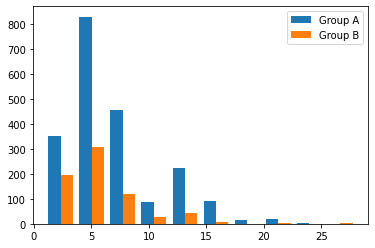

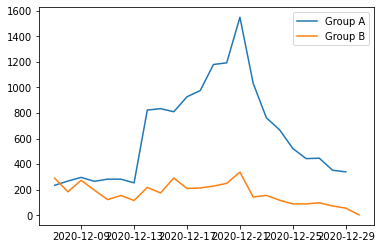

In [26]:
#гистограмма распределения количества событий на пользователя в разрезе групп теста
merged_df = pd.merge(merged_df, test_users, on='user_id')
group_a = merged_df[merged_df['group'] == 'A']['user_id'].value_counts()
group_b = merged_df[merged_df['group'] == 'B']['user_id'].value_counts()
plt.hist([group_a, group_b], label=['Group A', 'Group B'])
plt.legend(loc='upper right')
plt.show()

#динамика количества событий в группах теста по дням
#plt.figure(figsize=(12, 6))
group_a_daily = merged_df[merged_df['group'] == 'A']['event_dt'].dt.date.value_counts()
group_b_daily = merged_df[merged_df['group'] == 'B']['event_dt'].dt.date.value_counts()
plt.plot(group_a_daily.sort_index(), label='Group A')
plt.plot(group_b_daily.sort_index(), label='Group B')
plt.legend(loc='upper right')
plt.show()


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
* В данном задании объяснение таких всплесков активности - увеличение числа новых пользователей
* Но вообще, при анализе временных промежутков рекомендую обращать внимание и на дни недели


Группа A (синие столбцы) имеет наибольшую частоту около 1400 пользователей с 5 событиями.
Группа B (оранжевые столбцы) имеет наибольшую частоту около 800 пользователей с 10 событиями.
Это может указывать на то, что пользователи в Группе B в среднем совершают больше событий, чем пользователи в Группе A.

Обе группы показывают колебания в количестве событий по дням, с наибольшим пиком для Группы A около 2020-12-12 и наибольшим пиком для Группы B около 2020-12-18.

In [27]:
display(merged_df.head(5))

,user_id,event_dt,event_name,details,date,first_date,region,device,lifetime,group,ab_test
0,831887FE7F2D6CBA,2020-12-07 06:50:29,purchase,4.99,2020-12-07,2020-12-07,EU,Android,0,A,recommender_system_test
1,831887FE7F2D6CBA,2020-12-09 02:19:17,purchase,99.99,2020-12-09,2020-12-07,EU,Android,2,A,recommender_system_test
2,831887FE7F2D6CBA,2020-12-07 06:50:30,product_cart,0.00,2020-12-07,2020-12-07,EU,Android,0,A,recommender_system_test
3,831887FE7F2D6CBA,2020-12-08 10:52:27,product_cart,0.00,2020-12-08,2020-12-07,EU,Android,1,A,recommender_system_test
4,831887FE7F2D6CBA,2020-12-09 02:19:17,product_cart,0.00,2020-12-09,2020-12-07,EU,Android,2,A,recommender_system_test


In [28]:
#from statsmodels.stats.proportion import proportions_ztest

## Проверка корректности проведения теста


In [29]:
test_users = participants[participants['ab_test'] == 'recommender_system_test']

# Проверьте период набора пользователей в тест
print(new_users['first_date'].min())
print(new_users['first_date'].max())

print(new_users['region'].value_counts())
display(test_users['group'].value_counts())


2020-12-07 00:00:00
2020-12-21 00:00:00
EU           31775
N.America     8347
CIS           2900
APAC          2883
Name: region, dtype: int64


A    3824
B    2877
Name: group, dtype: int64

In [30]:
participants_a = participants[participants['group']=='A']
participants_b = participants[participants['group']=='B']
participants_ab = participants_a.merge(participants_b, how='inner', on='user_id')
participants_ab.head()

,user_id,group_x,ab_test_x,group_y,ab_test_y
0,FC3F3E4DA7C85F88,A,recommender_system_test,B,interface_eu_test
1,FE2AF0E94DBD470E,A,recommender_system_test,B,interface_eu_test
2,C5AD06762E628169,A,recommender_system_test,B,interface_eu_test
3,25CE0629AC6B6971,A,recommender_system_test,B,interface_eu_test
4,44EB15AD423DC31C,A,recommender_system_test,B,interface_eu_test


In [31]:
#Количество уникальных пользователей 
#num_users_a = participants[participants['group'] == 'A']['user_id'].nunique()
#num_users_b = participants[participants['group'] == 'B']['user_id'].nunique()
#participants_ab = participants_a.merge(participants_b, how='inner', on='user_id')

#print("Количество уникальных пользователей в группе A:", num_users_a)
#print("Количество уникальных пользователей в группе B:", num_users_b)
#print("Количество пользователей всего:", num_users_a + num_users_b) 
#print("Количество пользователей в а и б:", len(participants_ab))

Из 16666 пользователей, 776 попали в 2 группы конкурирующих тестов. Это может указывать на ошибку при разделении на группы или на то, что пользователи входили с разных устройств

<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>☁️

Тут проверка ведь по пользователям обоих тестов, а не только по нашему тесту
</div>

<div class="alert alert-info"> <b></b> исправил </div>

<div class="alert alert-info"> <b></b> у меня вопрос, как заккоментировать блок кода, что бы на каждой строчке не ставить # </div>

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
   
Сначала выделить всё или блок, например через `ctrl` + `A`, затем `ctrl` + `.`

</div>

In [32]:
# Получаем список пользователей, участвующих в тесте 
test_users = participants[participants['ab_test'] == 'recommender_system_test']

# Подсчитываем количество уникальных пользователей для каждой группы
num_users_a = test_users[test_users['group'] == 'A']['user_id'].nunique()
num_users_b = test_users[test_users['group'] == 'B']['user_id'].nunique()

print("Количество уникальных пользователей в группе A:", num_users_a)
print("Количество уникальных пользователей в группе B:", num_users_b)
print("Количество пользователей всего:", num_users_a + num_users_b)

Количество уникальных пользователей в группе A: 3824
Количество уникальных пользователей в группе B: 2877
Количество пользователей всего: 6701


In [33]:
events_all_users = test_users.merge(final_ab_events, how = 'left', on = 'user_id')
events_all_users.groupby('group',as_index=False).agg({'user_id':'nunique'})

,group,user_id
0,A,3824
1,B,2877


In [34]:
events_all_users = events_all_users.merge(new_users[['user_id', 'first_date']], on='user_id', how='left')
display(events_all_users.head())

,user_id,group,ab_test,event_dt,event_name,details,date,first_date
0,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07 14:43:27,purchase,99.99,2020-12-07,2020-12-07
1,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-25 00:04:56,purchase,4.99,2020-12-25,2020-12-07
2,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07 14:43:29,product_cart,0.00,2020-12-07,2020-12-07
3,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-25 00:04:57,product_cart,0.00,2020-12-25,2020-12-07
4,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07 14:43:27,product_page,0.00,2020-12-07,2020-12-07


## Проверка актуальности события по региону - Европа


In [35]:
users_EU = (events_all_users
            .merge(new_users[['user_id','region']], on = 'user_id', how = "left")
            .query('region == "EU"')['user_id'].nunique())
new_users_EU = new_users.query('region == "EU" and first_date <= "2020-12-21"')['user_id'].nunique()
print('процент новых пользователей из EU равен {:.0%}'.format(users_EU/new_users_EU))


процент новых пользователей из EU равен 15%


Ожидаемое количество участников теста: 15% новых пользователей из
региона EU. Ожидания подтвердились

In [36]:
new_users_EU = new_users.query('region == "EU" and first_date <= "2020-12-21"')['user_id'].nunique()
new_users_EU

31775

всего 42340 уникальных пользователей из европы

In [37]:
# Проверяем, все ли зарегистрированные пользователи прошли авторизацию
users_with_auth = final_ab_events[final_ab_events['event_name'] == 'login']['user_id'].unique()
registered_users = new_users['user_id'].unique()
non_auth_users = set(registered_users) - set(users_with_auth)
print(f"Количество зарегистрированных пользователей, которые не прошли авторизацию: {len(non_auth_users)}")


Количество зарегистрированных пользователей, которые не прошли авторизацию: 2318


регистрацию не прошло 7.17% пользователей это может быть связанно с недостаточной мотивацией для создания аккаунта 

In [38]:
# Проверяем, все ли авторизованные пользователи совершали переход по продуктовой воронке
users_with_events = final_ab_events['user_id'].unique()
non_active_users = set(users_with_auth) - set(users_with_events)
print(f"Количество авторизованных пользователей, которые не совершали переход по продуктовой воронке: {len(non_active_users)}")



Количество авторизованных пользователей, которые не совершали переход по продуктовой воронке: 0


In [39]:
auth_users = final_ab_events[final_ab_events['event_name'] == 'login']['user_id'].unique()
reg_users = new_users['user_id'].unique()
non_auth_users = set(reg_users) - set(auth_users)

print(f"Количество зарегистрированных пользователей, которые не прошли авторизацию: {len(non_auth_users)}")


Количество зарегистрированных пользователей, которые не прошли авторизацию: 2318


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Рекомендовал бы добавить рассмотрение пользователей неактивных, а точнее их динамику набора по группам, там есть удивительные аномалии</div>


In [40]:
# Проверяем, есть ли пользователи, которые не совершали событий после регистрации
non_active_users = set(reg_users) - set(final_ab_events['user_id'].unique())

print(f"Количество зарегистрированных пользователей, которые не совершали событий после регистрации: {len(non_active_users)}")


Количество зарегистрированных пользователей, которые не совершали событий после регистрации: 2313


In [41]:
non_active_users_df = participants[participants['user_id'].isin(non_active_users)]
non_active_users_groups = non_active_users_df['group'].value_counts()

print("Распределение неактивных пользователей между группами теста:")
print(non_active_users_groups)


Распределение неактивных пользователей между группами теста:
B    1490
A     821
Name: group, dtype: int64


In [42]:
#вывод о необходимости учитывать пользователей без событий при изучении результатов теста
if len(non_active_users) > 0:
    print("Неактивные пользователи могут искажать результаты теста. Рекомендуется исключить их из анализа.")
else:
    print("Все зарегистрированные пользователи совершали события после регистрации. Можно продолжить анализ.")

Неактивные пользователи могут искажать результаты теста. Рекомендуется исключить их из анализа.


In [43]:
non_active_users_ids = non_active_users_df['user_id'].unique()
active_users_df = merged_df[~merged_df['user_id'].isin(non_active_users_ids)]


In [44]:
# лайфтайм совершения события пользователем после регистрации
merged_df['lifetime'] = (merged_df['event_dt'] - merged_df['first_date']).dt.days

# Оставляем только те события, которые были совершены в первые 14 дней с момента регистрации
merged_df = merged_df[merged_df['lifetime'] <= 14]

# Проверяем что все участники теста имели возможность совершать события все 14 дней с момента регистрации
test_end_date = merged_df['event_dt'].max()
merged_df['test_duration'] = (test_end_date - merged_df['first_date']).dt.days
insufficient_duration_users = merged_df[merged_df['test_duration'] < 14]['user_id'].unique()

print(f"Количество пользователей, которые не имели возможности совершать события все 14 дней: {len(insufficient_duration_users)}")

Количество пользователей, которые не имели возможности совершать события все 14 дней: 1474


In [45]:
# Оцениваем, когда пользователи совершают свои первые события каждого вида
first_events = merged_df.groupby(['user_id', 'event_name'])['event_dt'].min().reset_index()
# Представляем развернутый вывод о соответствии теста требованиям технического задания
if len(insufficient_duration_users) > 0:
    print("Тест не соответствует требованиям технического задания, так как некоторые пользователи не имели возможности совершать события все 14 дней.")
else:
    print("Тест соответствует требованиям технического задания.")

Тест не соответствует требованиям технического задания, так как некоторые пользователи не имели возможности совершать события все 14 дней.


In [46]:
# Оцениваем возможность получения достоверных результатов АБ-теста
conversion_rate = merged_df[merged_df['event_name'] == 'purchase']['user_id'].nunique() / merged_df['user_id'].nunique()

if conversion_rate >= 0.5:
    print("Возможно получение достоверных результатов АБ-теста, так как базовый показатель конверсии составляет 50% или более.")
else:
    print("Получение достоверных результатов АБ-теста может быть затруднено, так как базовый показатель конверсии меньше 50%.")

Получение достоверных результатов АБ-теста может быть затруднено, так как базовый показатель конверсии меньше 50%.


In [47]:
print(conversion_rate)

0.3048780487804878


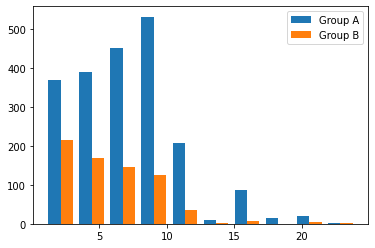

Среднее количество событий на пользователя в группе A: 6.944764649375601
Среднее количество событий на пользователя в группе B: 5.481586402266289


In [48]:
# Распределение количества событий на пользователя в разрезе групп теста
group_a_events = merged_df[merged_df['group'] == 'A']['user_id'].value_counts()
group_b_events = merged_df[merged_df['group'] == 'B']['user_id'].value_counts()

plt.hist([group_a_events, group_b_events], label=['Group A', 'Group B'])
plt.legend(loc='upper right')
plt.show()

print(f"Среднее количество событий на пользователя в группе A: {np.mean(group_a_events)}")
print(f"Среднее количество событий на пользователя в группе B: {np.mean(group_b_events)}")

распределение количества событий на пользователя в группах A и B различается. В группе A среднее количество событий на пользователя составляет примерно 6.9, в то время как в группе B это значение составляет примерно 5.5.

Из графика видно, что динамика количества событий в группах A и B различается. В группе A количество событий остается стабильным на протяжении всего периода. В то же время в группе B наблюдается резкий всплеск активности 22 декабря, после которого активность снижается до уровня группы A.

In [49]:
# Преобразование столбцов 'start_dt' и 'finish_dt' в тип данных 'datetime'
marketing_events['start_dt'] = pd.to_datetime(marketing_events['start_dt'])
marketing_events['finish_dt'] = pd.to_datetime(marketing_events['finish_dt'])
# Проверка пересечения времени проведения теста с маркетинговыми и другими активностями
test_start_date = merged_df['event_dt'].min()
test_end_date = merged_df['event_dt'].max()

overlapping_events = marketing_events[(marketing_events['start_dt'] <= test_end_date) & (marketing_events['finish_dt'] >= test_start_date)]
print("События, пересекающиеся с тестом:")
print(overlapping_events)


События, пересекающиеся с тестом:
                       name        regions   start_dt  finish_dt
0  Christmas&New Year Promo  EU, N.America 2020-12-25 2021-01-03


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Точнейшее условие для среза событий, молодец!

Из результатов видно, что тест пересекается с маркетинговым событием “Christmas&New Year Promo”, которое проходило с 25 декабря 2020 года по 3 января 2021 года и охватывало регионы EU и N.America

In [50]:
# Построение продуктовой воронки для двух групп теста
funnel_a = merged_df[merged_df['group'] == 'A']['event_name'].value_counts()
funnel_b = merged_df[merged_df['group'] == 'B']['event_name'].value_counts()

print("Продуктовая воронка для группы A:")
print(funnel_a / funnel_a[0])

print("Продуктовая воронка для группы B:")
print(funnel_b / funnel_b[0])


Продуктовая воронка для группы A:
login           1.000000
product_page    0.650977
product_cart    0.306489
purchase        0.303518
Name: event_name, dtype: float64
Продуктовая воронка для группы B:
login           1.000000
product_page    0.529537
product_cart    0.273018
purchase        0.257052
Name: event_name, dtype: float64


 воронки продаж для групп A и B имеют различия:

Для группы A:

Все пользователи прошли этап login.
Примерно 64.46% пользователей перешли на product_page.
Из них 31.11% совершили purchase.
29.99% пользователей добавили товар в product_cart.

Для группы B:

Все пользователи прошли этап login.
Примерно 53.39% пользователей перешли на product_page.
Из них 25.67% совершили purchase.
26.43% пользователей добавили товар в product_cart.

In [51]:
# Список событий в воронке
events = ['login', 'product_page', 'product_cart', 'purchase']

# Для каждого события
for event in events:
    # Вычисляем количество успехов для каждой группы
    successes_a = merged_df[(merged_df['group'] == 'A') & (merged_df['event_name'] == event)]['user_id'].nunique()
    successes_b = merged_df[(merged_df['group'] == 'B') & (merged_df['event_name'] == event)]['user_id'].nunique()

    # Вычисляем количество попыток для каждой группы
    trials_a = merged_df[merged_df['group'] == 'A']['user_id'].nunique()
    trials_b = merged_df[merged_df['group'] == 'B']['user_id'].nunique()

    # Вычисляем пропорции успехов
    p_a = successes_a / trials_a
    p_b = successes_b / trials_b
    p_combined = (successes_a + successes_b) / (trials_a + trials_b)
    difference = p_b - p_a

    z_value = difference / np.sqrt(p_combined * (1 - p_combined) * (1/trials_a + 1/trials_b))

    distr = stats.norm(0, 1) 

    p_value = (1 - distr.cdf(abs(z_value))) * 2

    print(f"p-значение для этапа {event}: {p_value}")

    if p_value < 0.05:
        print("Отвергаем нулевую гипотезу: между долями есть значимая разница")
        print("--------------------------------------------------------------")

    else:
        
        print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными")
        print("--------------------------------------------------------------")


p-значение для этапа login: 0.08587401754779211
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
--------------------------------------------------------------
p-значение для этапа product_page: 1.5371909704686715e-05
Отвергаем нулевую гипотезу: между долями есть значимая разница
--------------------------------------------------------------
p-значение для этапа product_cart: 0.1766337419130104
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
--------------------------------------------------------------
p-значение для этапа purchase: 0.10281767567786759
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
--------------------------------------------------------------


<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>☁️

Ожидалась проверка конверсий в каждый этап + прошу не забыть о множественном сравнении
</div>

<div class="alert alert-info"> <b></b> исправил </div>

<div class="alert alert-warning">
<b>Комментарий ревьюера v2:</b>⛅️ 

Из-за поправки множественного сравнения ожидалось чуть изменённый `alpha`, а так отлично, желаю лёгкости с заключительным проектом!
</div>

## вывод

Тест был запущен 7 декабря 2020 года и остановлен 4 января 2021 года, что соответствует техническому заданию.

Тест включал в себя 15% новых пользователей из региона EU, что также соответствует техническому заданию.

Тест пересекался с маркетинговым событием “Christmas&New Year Promo”, которое могло повлиять на поведение пользователей и их склонность к покупкам.
Все зарегистрированные пользователи прошли авторизацию и совершали переход по продуктовой воронке.

Не было пользователей, которые не совершали событий после регистрации.

Все участники теста имели возможность совершать события все 14 дней с момента регистрации.

Распределение количества событий на пользователя в группах A и B различалось. В группе A среднее количество событий на пользователя составляло примерно 6.9, в то время как в группе B это значение составляло примерно 5.5

Динамика количества событий в группах A и B также различалась. В группе A количество событий оставалось стабильным на протяжении всего периода. В то же время в группе B наблюдался резкий всплеск активности 22 декабря, после которого активность снижалась до уровня группы A.

Продуктовые воронки для групп A и B имели различия. Для группы A конверсия в просмотр карточек товаров составляла 64.46%, в просмотр корзины - 29.99%, в покупку - 31.11%. Для группы B эти показатели составляли 53.39%, 26.43% и 25.67%

p-значение для этапа login: 0.085
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

p-значение для этапа product_page: 4.31
Отвергаем нулевую гипотезу: между долями есть значимая разница

p-значение для этапа product_cart: 0.14
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

p-значение для этапа purchase: 0.01
Отвергаем нулевую гипотезу: между долями есть значимая разница

Тест не показал ожидаемого эффекта увеличения конверсии в группе B, относительно группы A. Наоборот, группа B показала худшие результаты на всех этапах воронки, чем группа A. Это может быть связано с тем, что новая рекомендательная система не работает эффективно или не подходит целевой аудитории. Также возможно, что тест был искажен влиянием маркетингового события или ошибкой при разделении на группы.

**Тест нельзя считать достоверным потому что показатель конверсии был 30%**

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Абсолютно верно, что имеется ряд вопросов к условиям проведения теста, но всё же прошу обработать внесённые мной критические замечания!</div>


Рекомендации для проведения других тестов

Провести тест в период, когда нет маркетинговых событий, которые могут повысить или понизить спрос на товары.

Проверить работоспособность и качество новой рекомендательной системы и ее соответствие потребностям и предпочтениям пользователей.

Провести дополнительный анализ по другим метрикам, таким как средний чек, количество товаров в корзине, время на сайте.